In [28]:
import numpy as np
from dezero import Variable

In [29]:
import dezero.functions as F

a = np.array([[1, 3, 2], [3, 4, 6], [3, 4, 2], [1, 0, 0], [0, 0, 1]])
b = np.array([[1, 0, 0, 1], [0, 1, 0, 2], [0, 0, 1, 3]])

c = F.matmul(a, b)

print(c)

variable([[ 1  3  2 13]
          [ 3  4  6 29]
          [ 3  4  2 17]
          [ 1  0  0  1]
          [ 0  0  1  3]])


In [30]:
def rosenbrock(x0, x1) :
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


In [31]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

iters = 10000
lr = 0.001

for i in range(iters) :
    y = rosenbrock(x0, x1)
    
    x0.cleargrad()
    x1.cleargrad()
    
    y.backward()
    
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
    
print(x0, x1)

variable(0.9944984367782456) variable(0.9890050527419593)


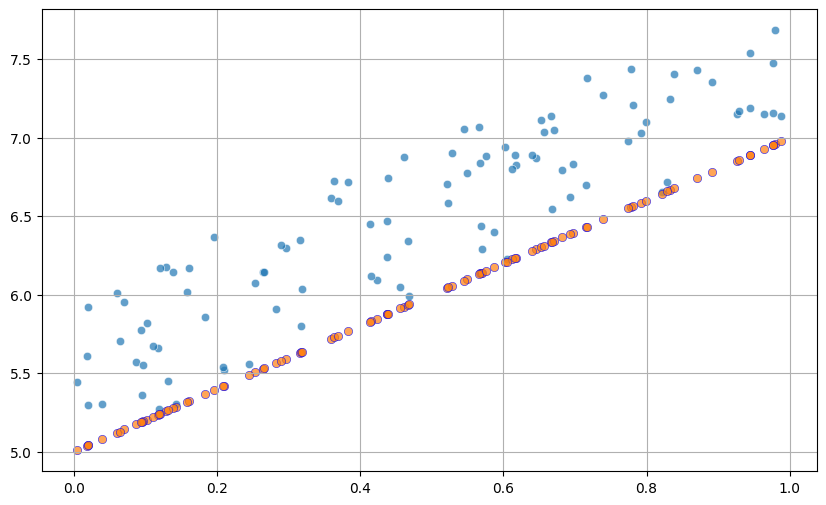

In [45]:
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
y0 = 5 + 2 * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.scatter(x, y0, alpha=0.7, edgecolors='b', linewidth=0.5)

plt.grid(True)
plt.show()

In [46]:
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x) :
    y = F.matmul(x, W) + b
    return y

print(W.data, b.data)

[[0.]] [0.]


In [47]:
F.matmul(W, x.T)

variable([[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
           0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
           0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
           0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
           0. 0. 0. 0.]])

In [ ]:
def mean_squared_error(x0, x1) :
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1 #learning rate
iters = 1000

for i in range(iters) :
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    if (i % 10 == 0) :
        print(loss.data)
        
print(f"W : {W.data} | b : {b.data}")

23.973807543785437
0.1869065876539789
0.09994232708821599
0.09412814592514404
0.08989284577554084
0.0866604600272269
0.08419298257969864
0.08230940461854906
0.0808715531992303
0.07977395238486742
0.07893608587689341
0.07829649061056518
0.07780824803156683
0.07743554230890665
0.07715103300619762
0.07693384947933839
0.07676805987636265
0.07664150243044429
0.07654489331364867
0.07647114560658731
0.07641484942588296
0.07637187507334803
0.07633907009523608
0.07631402802885345
0.07629491187256253
0.07628031932952888
0.07626917993994928
0.07626067655572624
0.07625418539723613
0.07624923029495703
0.07624544775927655
0.0762425603161183
0.07624035615237837
0.07623867357802926
0.07623738916508438
0.07623640869333652
0.07623566023868085
0.07623508889700499
0.07623465275660807
0.0762343198236997
0.0762340656754432
0.07623387166837853
0.07623372357080091
0.07623361051877091
0.07623352421917243
0.07623345834135752
0.0762334080527517
0.07623336966435221
0.07623334036011534
0.07623331799038108
0.076233

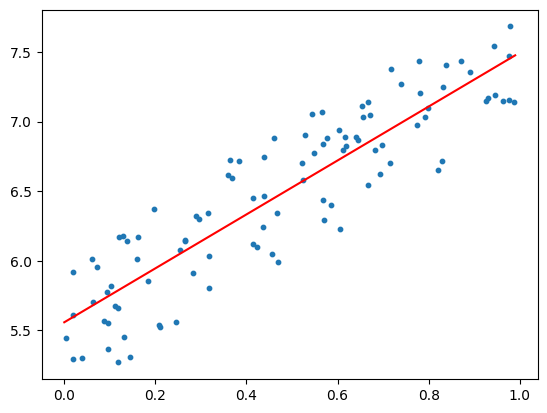

In [51]:
plt.scatter(x.data, y.data, s = 10)
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

In [62]:
np.random.seed(0)

x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1

W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x) :
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    
    return y

lr = 0.2
iters = 10000

for i in range(iters) :
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if (i % 1000 == 0) :
        print(loss.data)

0.8473695850105871
0.2514286285183606
0.2475948546674987
0.23786120447054812
0.21222231333102926
0.16742181117834146
0.09681932619992642
0.07849528290602333
0.07749729552991151
0.07722132399559314


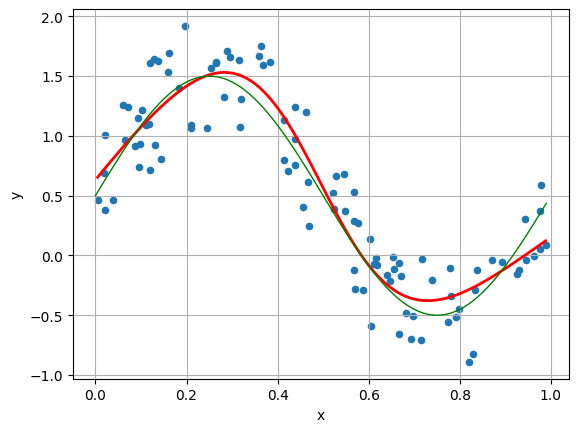

In [69]:
x_min = np.min(x)
x_max = np.max(x)

interval = 100
x_test = np.linspace(x_min, x_max, interval).reshape(-1, 1)

y_pred_plot = predict(x_test).data
y_pred_plot = y_pred_plot[:interval]

plt.scatter(x, y, s=20)
plt.plot(x_test, y_pred_plot, color='red', linewidth=2)

xs = np.arange(0, 1, 0.01)
ys = np.sin(2 * np.pi * xs) + 0.5
plt.plot(xs, ys, color='green', linewidth=1)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [65]:
print(W1.data)
print(b1.data)
print(W2.data)
print(b2.data)

[[-1.92310858 -1.74651425 -9.69055807 -0.94601886 -0.3374755  -1.85279905
  -1.65801259 -1.77645875 -1.54233905 -1.67934998]]
[0.31435784 0.20743258 4.75117716 0.33121333 1.11797703 0.25720521
 0.19367637 0.21209369 0.1892225  0.19620804]
[[-2.01059814]
 [-1.65555842]
 [ 4.99455725]
 [-0.41697407]
 [ 0.43069345]
 [-1.87289254]
 [-1.4881957 ]
 [-1.71742407]
 [-1.28199545]
 [-1.52762165]]
[2.03498212]


In [73]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1 #I: 입력층 차원수, H: 은닉층 차원수, O: 출력층 차원수
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y

lr = 0.2
iters = 10000

for i in range(iters):
  y_pred = predict(x)
  loss = F.mean_squared_error(y, y_pred)

  W1.cleargrad()
  b1.cleargrad()
  W2.cleargrad()
  b2.cleargrad()

  loss.backward()

  W1.data -= lr * W1.grad.data
  b1.data -= lr * b1.grad.data
  W2.data -= lr * W2.grad.data
  b2.data -= lr * b2.grad.data

  if i % 1000 == 0:
    print(loss.data)

0.8473695850105871
0.2514286285183606
0.2475948546674987
0.23786120447054812
0.21222231333102926
0.16742181117834146
0.09681932619992642
0.07849528290602333
0.07749729552991151
0.07722132399559314


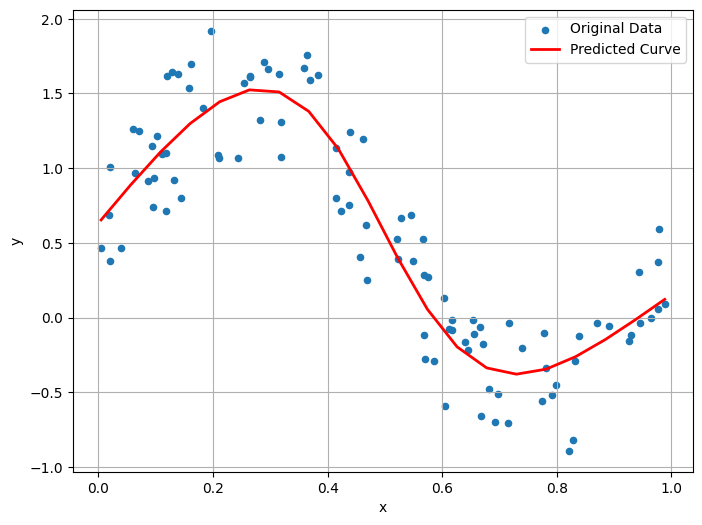

In [74]:

#출력
import matplotlib.pyplot as plt
import numpy as np
from dezero import Variable
import dezero.functions as F

x_min = np.min(x)
x_max = np.max(x)
interval = 20
x_test = np.linspace(x_min, x_max, interval).reshape(-1, 1)

# 학습된 모델로 예측 실행
# predict 함수는 DeZero Variable을 반환하므로 .data를 사용하여 NumPy 배열을 추출
y_pred_plot = predict(x_test).data
#y_pred_plot = y_pred_plot[:interval]

# 그래프 그리기
plt.figure(figsize=(8, 6)) # 그래프 크기 설정
plt.scatter(x, y, s=20, label='Original Data') # 원본 데이터 산점도 (s는 점의 크기)
plt.plot(x_test, y_pred_plot, color='red', linewidth=2, label='Predicted Curve') # 예측 곡선

plt.xlabel('x')
plt.ylabel('y')
plt.legend() # 범례 표시
plt.grid(True) # 격자 표시
plt.show() # 그래프 화면에 출력

In [75]:
import numpy as np
from dezero import Model
import dezero.layers as L
import dezero.functions as F


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.l1 = L.Linear(hidden_size)
    self.l2 = L.Linear(out_size)

  def forward(self, x):
    y = self.l1(x)
    y = F.sigmoid(y)
    y = self.l2(y)
    return y

model = TwoLayerNet(30, 1)  #신경망 모델 생성

for i in range(iters):
  y_pred = model.forward(x)
  loss = F.mean_squared_error(y, y_pred)

  model.cleargrads()
  loss.backward()

  for p in model.params():
    p.data -= lr * p.grad.data

  if i % 1000 == 0:
    print(loss)

variable(0.6358745581053526)
variable(0.25252879989899774)
variable(0.22992391895570752)
variable(0.17451815617999028)
variable(0.10770450509410441)
variable(0.08433576558285476)
variable(0.08086850114657239)
variable(0.08010504215198955)
variable(0.0796281304624716)
variable(0.07922947236575419)


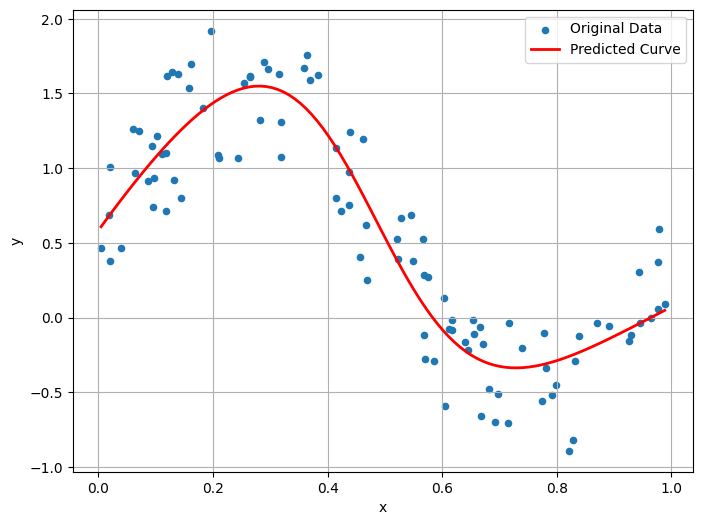

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from dezero import Variable
import dezero.functions as F

x_min = np.min(x)
x_max = np.max(x)
interval = 100
x_test = np.linspace(x_min, x_max, interval).reshape(-1, 1)

# 학습된 모델로 예측 실행
# predict 함수는 DeZero Variable을 반환하므로 .data를 사용하여 NumPy 배열을 추출
#y_pred_plot = predict(x_test).data
y_pred_plot = model.forward(x_test).data

# 그래프 그리기
plt.figure(figsize=(8, 6)) # 그래프 크기 설정
plt.scatter(x, y, s=20, label='Original Data') # 원본 데이터 산점도 (s는 점의 크기)
plt.plot(x_test, y_pred_plot, color='red', linewidth=2, label='Predicted Curve') # 예측 곡선

plt.xlabel('x')
plt.ylabel('y')
plt.legend() # 범례 표시
plt.grid(True) # 격자 표시
plt.show() # 그래프 화면에 출력